# Natural Language Processing with spaCy

---

## Today we are going to learn about NLP (Natural Language Processing) using spaCy, an open source library for advanced NLP. 

### For more on spaCy, you can check out their site: https://spacy.io/

In [ ]:
# !pip install spaCy 

# if this command doesn't work, go to your terminal and type 'sudo pip install spaCy'
# this will require you to enter your password, but should work if 'pip' alone did not

## Natural Language Processing (NLP) is a subfield of Artificial Intelligence that deals with the 'understanding' of language. 

### For the purposes of this tutorial, we are going to look at the very basics of NLP, including using spaCy, an open-source NLP library. 

In [ ]:
 # import the English language class

 # create an nlp object; this object contains the processing pipeline, which you 
                # ultimately use to analyze the text
    
 # "Hello world!" becomes the text that we want to analyze
                          # when you process a text with the nlp object, spaCy creates a Doc object
    
 # for every token in our Doc object (a token being a word or character)...
     # simply print out that token 

### Similar to how you index through a list in Python, you can index through a Doc to retreive tokens. 

In [ ]:
 # print the full text 
 # print the second token (remember, Python is 0-index) in our Doc object

### You can also use 'span' which lets you take a slice of the Doc

In [ ]:
 # this will give us the first and second (again, remember, Python is 0-index)
                # the span is not inclusive, so we don't actually get the third token (second index)

 # print the full text
 # print the second and third tokens 

## What else can we do with spaCy? 

### Tokens have lots of attributes associated with them! For instance: 

1. is_alpha returns boolean indicating if a token consists of an alphanumeric value
2. is_punct returns boolean indicating if a token is punctuation
3. like_num returns boolean indicating if a token resembles a number 

### These are all called "lexical attributes" – they refer to the entry in the vocabulary and don't depend on the token's context. (More on that later). 

In [ ]:
 # the text we want to work with 

 # i being the index of the token in the Doc
 # return the text of the token

 # just so we have some nice spacing in our results below...

 # if token consists of an alphanumeric value
 # if token is punctuation
 # if token resembles a number (e.g., '10' or 'TEN')

### How might that be helpful in real life? 

### Imagine you are charged with reporting on a long press release, and you just want to know where in the document a percent increase or percent decrease is mentioned...

In [ ]:
doc = nlp("In 2012, earnings were hovering around 60%, verus in 2019 where they are less than 4% – a 93% decrease.")

 # for every token in our Doc object...
     # if the token resembles a numerical value...
         # look at the token following that numerical value...
         # if that token is a "%" sign...
             # look at the token following the "%"
             # if the token after the % is the word "decrease" or "increase"...
                 # we know we have found a percentage value

## spaCy also has a handful of pre-built models:

In [ ]:
# !python -m spacy download en # let's install the "english" package, which contains four models 
                             # for more information on the models included, 
                             # check out: https://spacy.io/models/en


In [ ]:
import spacy 

nlp = spacy.load('en') # loading in the package we just downloaded...

doc = nlp("Adidas AG and Gap Inc. are among those at the end of the long supply chain that travel through \
           China’s northwest region of Xinjiang.") # this is the text we want to analyze 
                                                   # that '\' above just lets me split the text into a new 
                                                   # line in my notebook, and isn't part of the text itself

 # for each token in our Doc...
     # print the following:
    
    # .pos_ will give us the parts of speech for each token
    # .dep_ will give us the predicted dependency label 
    # .head.text will give us the 'syntactic head token' (think of it as the parent token this word is attached to)

## You can use ent.label_ to decipher entities...

In [ ]:
doc = nlp("Adidas AG and Gap Inc. are among those at the end of the long supply chain that travel through \
           China’s northwest region of Xinjiang.")

 # for each entity in our Doc...
     # print it alongside its label

## To get quick definitions of common tags and labels, you can use ".explain"


## spaCy also lets you write rules to find words and/or phrases in a text. Similar to Regular Expressions, but with some major benefits unique to spaCy. 

### In particular, it allows you to match on Doc objects (not just strings), use the model's prediction capabilities, and match on tokens and token attributes. Match patterns in spaCy are comprised of lists of dictionaries, and each dictionary describes one token. 

### The keys in the dictionary are the names of the token attributes, and are mapped to their expected value. 

In [ ]:
doc = nlp("New iPhone X release date leaked as Apple reveals pre-orders by mistake.") # our text

from spacy.matcher import Matcher # import the matcher
matcher = Matcher(nlp.vocab) # initialize the matcher

    # match these exact token texts

 # add the pattern to the matcher

 # call the matcher on our Doc and store the result as a list called 'matches'



### You'll note that the matcher returns a list of tuples. Each tuple consists of three values: 

    1. The match ID
    2. The start index of the matched span
    3. The end index of the matched span
    
### Fortunately, we can iterate over our matches

In [ ]:

     # start = start index of matched span; end = end index of matched span
    

### Remember, you can also match on lexical attributes and token attributions. For instance, below we are going to look for five tokens: 

1. A token consisting of only digits
2. Two, case-insensitive tokens for the words "revenue" and "up"
3. Another token that consists of only digits
4. A punctuation token

In [ ]:
doc = nlp("Earnings are in today! 2019 Revenue up 45%! This is the highest revenue in 5 years.")

     # looking for a token consisting of only digits
     # looking for the word "revenue"
     # looking for the word "up"
     # looking for a token consisting of only digits
    # looking for a punctuation token 


 # add the pattern to the matcher



     # start = start index of matched span; end = end index of matched span


## A note on Operators and Quantifiers.

### Operators and Quantifiers let you define how often a token should be matched. 

### An Operator can have one of four values: 

1. An "!" negates the token, so it's matched 0 times
2. A "?" makes the token optional, so it matches 0 or 1 times
3. A "+" matches a token 1 or more times
4. A "*" matches a token 0 or more times

### Below, the "?" Operator makes the determiner token optional, so it will match a token with the lemma "raise", followed by an optonal article and a noun:

In [ ]:
doc = nlp("Earnings are in today! 2019 Revenue up 45% for Company X. This is the highest revenue in 5 years.")

# note that our text above has changed... 

pattern = [
    {'IS_DIGIT': True}, # looking for a token consisting of only digits
    {'LOWER': 'revenue'}, # looking for the word "revenue"
    {'LOWER': 'up'}, # looking for the word "up"
    {'IS_DIGIT': True}, # looking for a token consisting of only digits
     # looking for an OPTIONAL punctuation token
]

matcher.add('REVENUE_PATTERN', None, pattern) # add the pattern to the matcher

matches = matcher(doc)

print("Matches:", [doc[start:end].text for match_id, start, end in matches])

## Now let's delve into Vocabularies

### spaCy stores all shared data in a vocabulary, which includes words, as well as the labeled schemas for tags and entities. It also uses a hash function to generate an ID for each string, which is stored in a string store and is available via nlp.vocab.strings

### This string store is ultimately a lookup table whereby you can look up a string to get its hash, or, look up a hash to get the string. For instance:

In [ ]:
doc = nlp("I love coffee") # our text

 # print the hash value given the text
 # print the text value given the hash 

## spaCy even lets you compare two objects to predict how similar they are. 

### These objects can be documents, spans, or single tokens. 

In [ ]:
# !sudo python -m spacy download en_core_web_md

import en_core_web_md # you only have to download it in the line above if you didn't earlier

nlp = en_core_web_md.load()

# compare two documents

 # doc 1 to be compared
 # doc 2 to be compared



### We can also compare two tokens: 

In [ ]:
nlp = en_core_web_md.load()

doc = nlp("I like pizza and pasta")

# compare two tokens

 # the word "pizza"
 # the word "pasta"



In [ ]:
doc = nlp("TV and books")



 # get the similarity of the tokens "TV" and "books"



### Or, a document with a token: 

In [ ]:
nlp = en_core_web_md.load()

# compare a document with a token

 # this full text
 # the word "soap"



### And, last but not least, a span with a document: 

In [ ]:
nlp = en_core_web_md.load()

# compare a span with a document

 # the words "pizza and pasta"
 # this full text



## BeautifulSoup + spaCy

### Now, let's use some of the BeautifulSoup to analyze some text from an online source:

In [ ]:
import time
import re
import csv
import requests
from bs4 import BeautifulSoup

r = requests.get('https://www.wsj.com/articles/singapores-gic-bets-on-wastewater-company-takes-stake-at-3-billion-valuation-11558085401') 
    # for more on the requests library check out this tutorial from RealPython: 
    # https://realpython.com/python-requests/
            
soup = BeautifulSoup(r.text,'html') # we are going to turn that URL into 'soup', aka, we are going to be 
                                    # able to see it's metadata For more on BeautifulSoup, check out: 
                                    # https://www.crummy.com/software/BeautifulSoup/bs4/doc/
            
print(soup)

### Now, we know that what we're interested in is the text of this article. So, let's see what that looks like in the HTML.

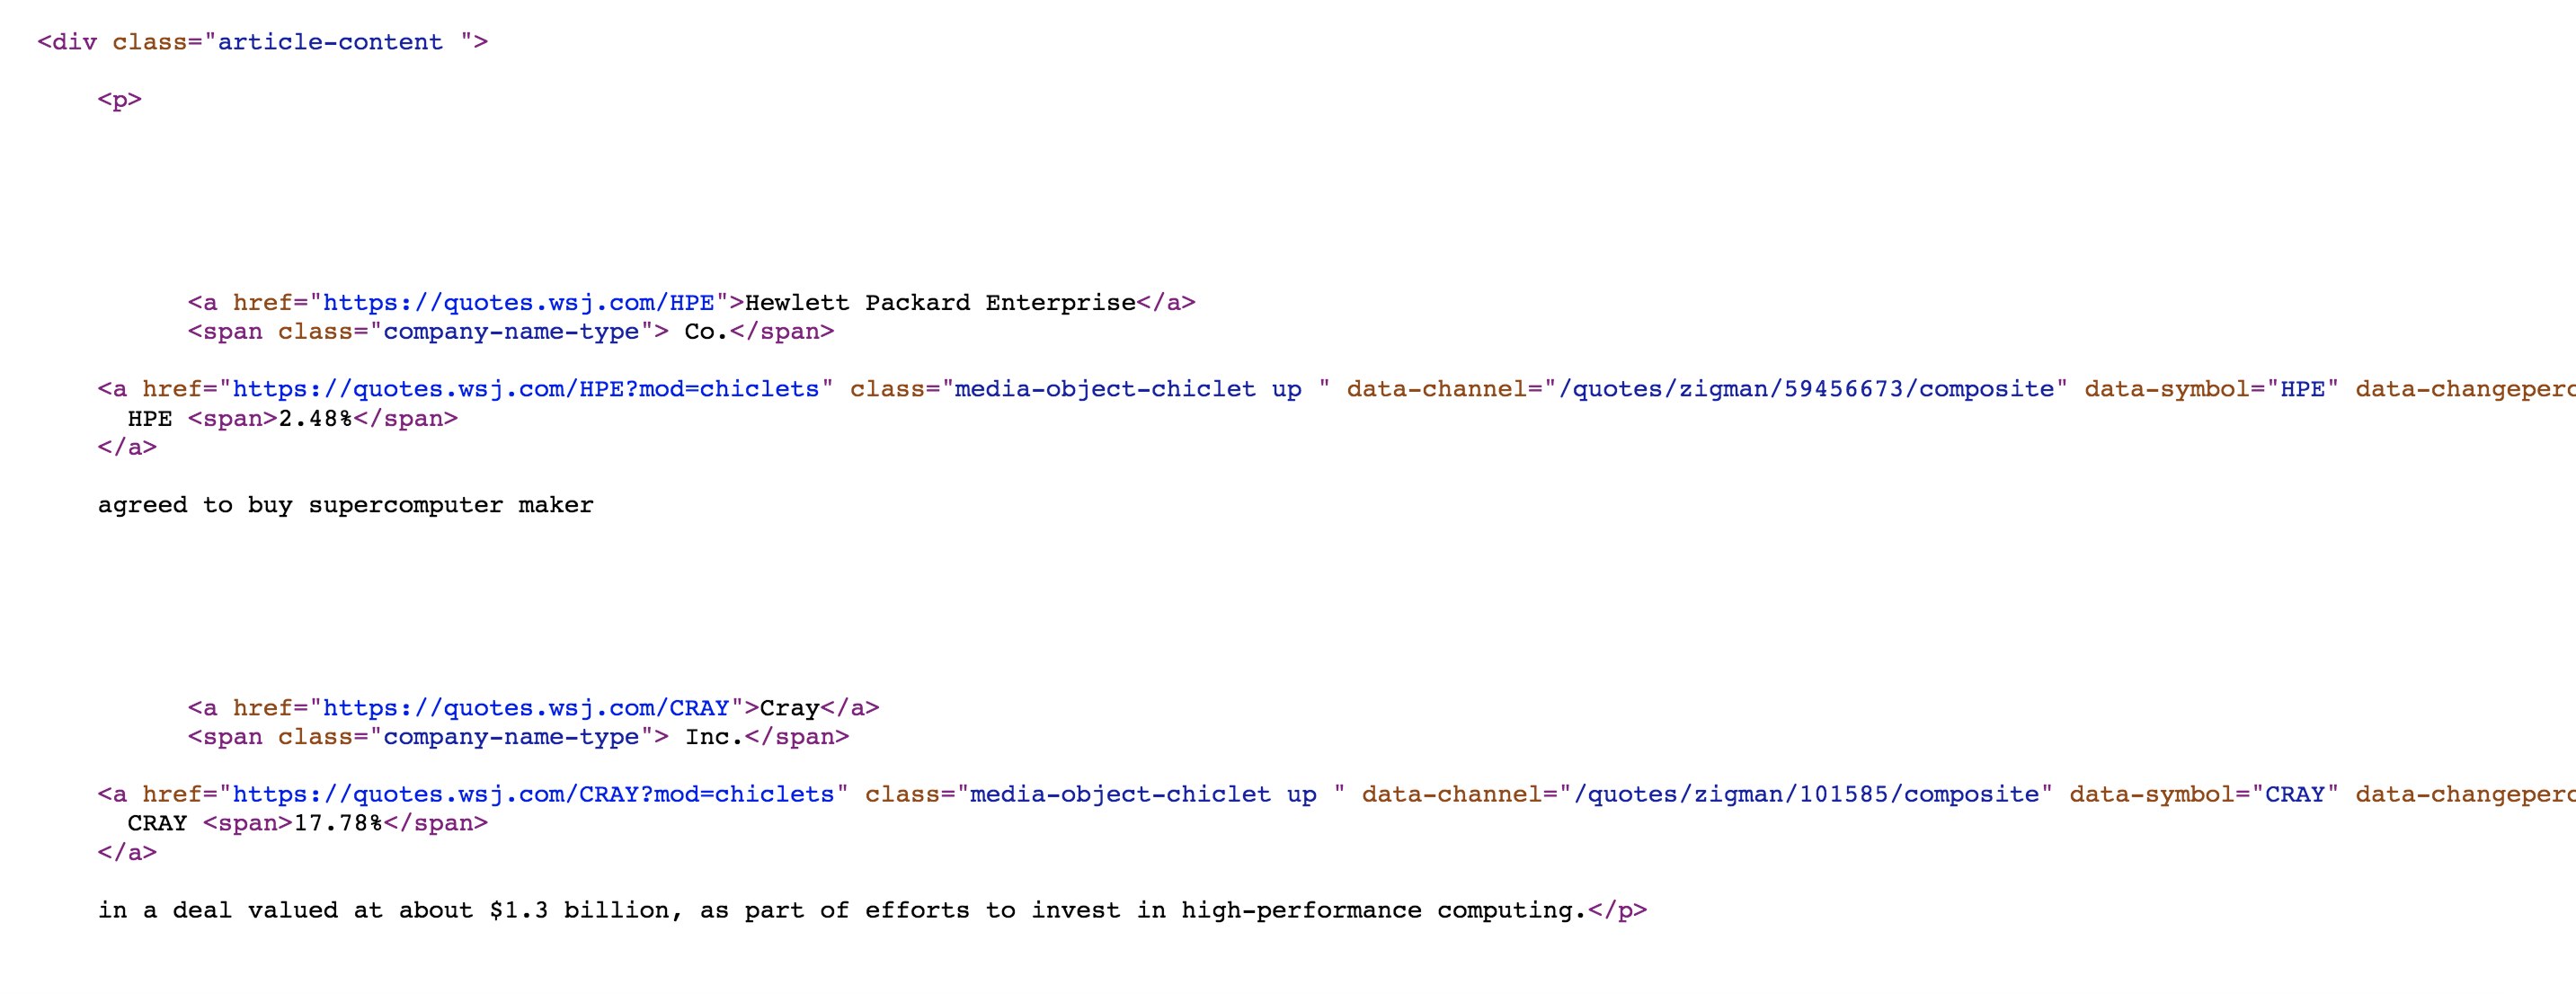

In [ ]:
 # find all of the <p> elements in our text



In [ ]:
 # join all of those paragraphs together



### You'll note that we only get the first 500 characters of the article because, well, we're paywalled! Nevertheless, let's see what we can do...

### What if we want to know what entities are mentioned in the article? 

In [ ]:
nlp = spacy.load('en')

 # our text is going to be the article text above (that first 500 characters)

 # for each entity in our Doc...
     # print that entity aside its label

### What if we want to know if the article mentions anything about a stock purchase or sale...

In [ ]:


 # initialize the Matcher and add the patterns



 # iterate over the matches
     # print pattern string name and text of matched span

## What if we use a much, much bigger text? Say, the Mueller Report? 

In [ ]:
import spacy

report = open("/Users/siegmanA/Desktop/NYU-Projects-in-Programming-Fall-2019/(Class 6) Text Mining and NLP /mueller_report.csv").read()

# csv via https://www.kaggle.com/paultimothymooney/mueller-report

report_part1 = report[0:100000] # we need to take the first 100k characters because that is the spaCy limit

nlp = spacy.load('en')

doc = nlp(report_part1)

### Let's see all the organizations named in the first 100k characters of the Mueller report...


### How about any mentions of "WikiLeaks" or "Trump Tower Meeting"?

In [ ]:
 # import the matcher




 # iterate over the matches returned by the matcher
    
     
     # get the span's root token and root head token
     # get the previous token and its POS tag
    
    
    

### You'll notice this is all a bit jumbled because of the formatting in the report itself, and the redactions, et. cetera. So let's copy & paste a clean section to work with...

In [ ]:
from spacy.matcher import Matcher # import the matcher

matcher = Matcher(nlp.vocab)

doc = nlp("""The social media campaign and the GRU hacking operations coincided with a series of contacts between 
Trump Campaign officials and individuals with ties to the Russian government. The Office investigated whether those 
contacts re?ected or resulted in the Campaign conspiring or coordinating with Russia in its election-interference 
activities. Although the investigation established that the Russian government perceived it would benefit from a 
Trump presidency and worked to secure that outcome, and that the Campaign expected it would bene?t electorally from 
information stolen and released through Russian efforts, the investigation did not establish that members of the 
Trump Campaign conspired or coordinated with the Russian government in its election interference activities. The 
Russian contacts consisted of business connections, offers of assistance to the Campaign, invitations for candidate 
Trump and Putin to meet in person, invitations for Campaign officials and representatives of the Russian government 
to meet, and policy positions seeking improved U.S.-Russian relations. Section IV of this Report details the contacts 
between Russia and the Trump Campaign during the campaign and transition periods, the most salient of which are 
summarized below in chronological order. 2015. Some of the earliest contacts were made in connection with a Trump 
Organization real-estate project in Russia known as Trump Tower Moscow. Candidate Trump signed a Letter of Intent 
for Trump Tower Moscow by November 2015, and in January 2016 Trump Organization executive Michael Cohen emailed and 
spoke about the project with the of?ce of Russian government press secretary Dmitry Peskov. The Trump Organization 
pursued the project through at least June 2016, including by considering travel to Russia by Cohen and candidate 
Trump.""")

 # iterate over the matches returned by the matcher
     
    
     # get the span's root token and root head token
     # get the previous token and its POS tag



----

## An enormous thank you to spaCy, whose existing online courses (https://course.spacy.io/chapter1) were the basis for this Jupyter-ized tutorial. For more information on spaCy's existing online course, check out https://github.com/ines/spacy-course#-faq